In [1]:
import pandas as pd
import numpy as np

java = pd.read_csv('./processed/java_mb_KG.txt',sep='\t',names=['userid','itemid','oper','timestamp'])
java

,userid,itemid,oper,timestamp
0,1,305,watch,1406863244
1,1,172,done,1410874261
2,1,54,done,1410874265
3,1,54,duration,1410874275
4,1,314,done,1410913417
...,...,...,...,...
2489,183,294,done,1429083169
2490,183,294,tag,1429083255
2491,183,294,duration,1429083393
2492,183,357,done,1429084813


In [ ]:
java.boxplot(column='userid', by='timestamp', figsize=(64,64))

In [ ]:
java.plot(kind="scatter",x='timestamp',y='userid',figsize=(32,32))

In [ ]:
java.plot(kind="scatter",x='userid',y='timestamp',figsize=(32,32))

In [5]:
import datetime
java['time'] = java['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
java

,userid,itemid,oper,timestamp,time
0,1,305,watch,1406863244,2014-08-01
1,1,172,done,1410874261,2014-09-16
2,1,54,done,1410874265,2014-09-16
3,1,54,duration,1410874275,2014-09-16
4,1,314,done,1410913417,2014-09-17
...,...,...,...,...,...
2489,183,294,done,1429083169,2015-04-15
2490,183,294,tag,1429083255,2015-04-15
2491,183,294,duration,1429083393,2015-04-15
2492,183,357,done,1429084813,2015-04-15


In [7]:
java['time_m'] = java['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"))

<AxesSubplot:xlabel='time', ylabel='userid'>

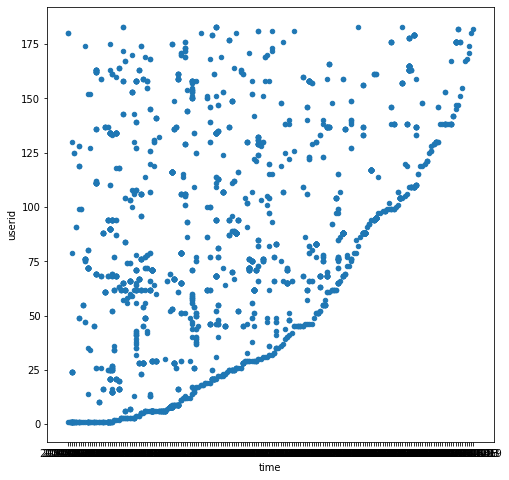

In [6]:
java.plot(kind="scatter",x='time',y='userid',figsize=(8,8))

<AxesSubplot:xlabel='time_m', ylabel='userid'>

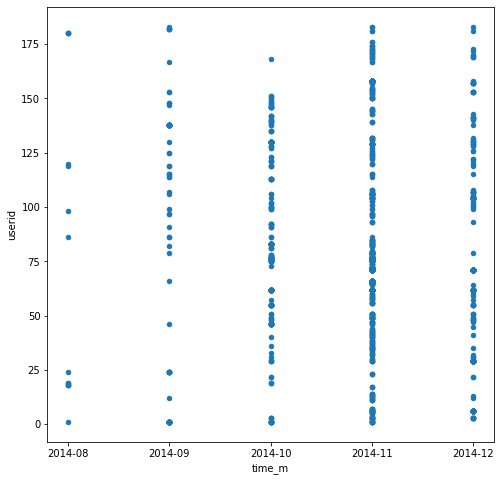

In [9]:
java[java['time_m'].isin(['2014-08','2014-09','2014-10','2014-11','2014-12'])].plot(kind="scatter",x='time_m',y='userid',figsize=(8,8))

<AxesSubplot:xlabel='time_m', ylabel='userid'>

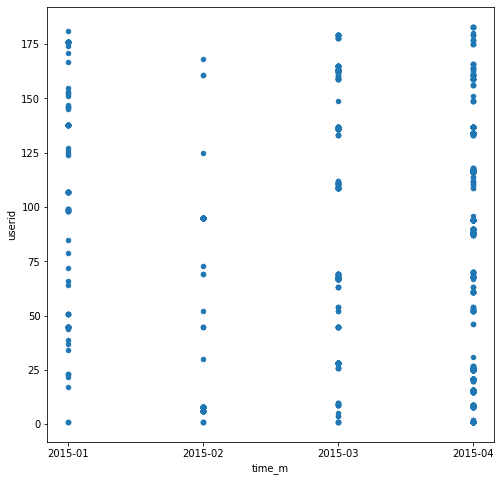

In [10]:
java[java['time_m'].isin(['2015-01','2015-02','2015-03','2015-04','2015-05'])].plot(kind="scatter",x='time_m',y='userid',figsize=(8,8))

In [19]:
num = [java[java['time_m']==x].size for x in ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']]
num

[96, 462, 1494, 3966, 1422, 732, 822, 1734, 4236]

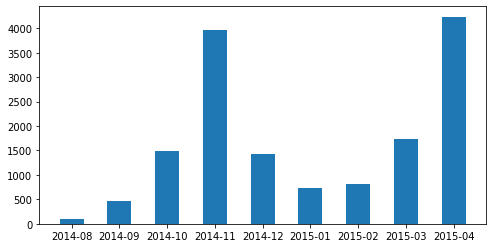

In [21]:
import matplotlib.pyplot as plt

x = ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']
y = num
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.5)
plt.show()

In [27]:
java.groupby('userid').count().sort_values(by='itemid')

,itemid,oper,timestamp,time,time_m
userid,,,,,
155,4,4,4,4,4
147,4,4,4,4,4
152,4,4,4,4,4
154,4,4,4,4,4
64,4,4,4,4,4
...,...,...,...,...,...
68,65,65,65,65,65
95,65,65,65,65,65
1,76,76,76,76,76


In [29]:
java[java['userid']==1]

,userid,itemid,oper,timestamp,time,time_m
0,1,305,watch,1406863244,2014-08-01,2014-08
1,1,172,done,1410874261,2014-09-16,2014-09
2,1,54,done,1410874265,2014-09-16,2014-09
3,1,54,duration,1410874275,2014-09-16,2014-09
4,1,314,done,1410913417,2014-09-17,2014-09
...,...,...,...,...,...,...
71,1,295,duration,1429522209,2015-04-20,2015-04
72,1,294,done,1429522215,2015-04-20,2015-04
73,1,297,duration,1429559369,2015-04-21,2015-04
74,1,297,done,1429600652,2015-04-21,2015-04


In [30]:
net = pd.read_csv('./processed/net_mb_KG.txt',sep='\t',names=['userid','itemid','oper','timestamp'])
net['time'] = net['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
net['time_m'] = net['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"))
net

,userid,itemid,oper,timestamp,time,time_m
0,1,1,enter,1413883798,2014-10-21,2014-10
1,1,1,done,1413883869,2014-10-21,2014-10
2,1,1,watch,1415244162,2014-11-06,2014-11
3,1,1,tag,1415330742,2014-11-07,2014-11
4,2,1,watch,1414155169,2014-10-24,2014-10
...,...,...,...,...,...,...
3591,246,285,done,1429539992,2015-04-20,2015-04
3592,246,286,done,1429624580,2015-04-21,2015-04
3593,246,287,tag,1429753275,2015-04-23,2015-04
3594,246,1,tag,1429794648,2015-04-23,2015-04


In [31]:
net_num = [net[net['time_m']==x].size for x in ['2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']]
net_num

[2310, 4596, 3936, 930, 138, 3168, 6330]

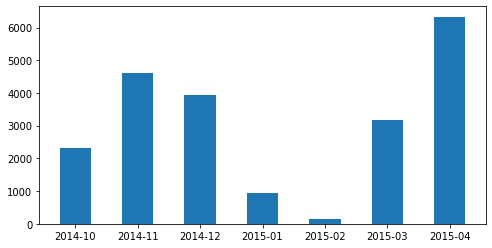

In [32]:
x = ['2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']
y = net_num
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.5)
plt.show()

In [33]:
os = pd.read_csv('./processed/os_mb_KG.txt',sep='\t',names=['userid','itemid','oper','timestamp'])
os['time'] = os['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
os['time_m'] = os['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"))
os

,userid,itemid,oper,timestamp,time,time_m
0,1,397,tag,1429497734,2015-04-20,2015-04
1,1,428,done,1429497741,2015-04-20,2015-04
2,1,429,done,1429497796,2015-04-20,2015-04
3,1,417,done,1429497920,2015-04-20,2015-04
4,1,428,tag,1429499516,2015-04-20,2015-04
...,...,...,...,...,...,...
4695,304,476,duration,1428396833,2015-04-07,2015-04
4696,305,397,tag,1428674222,2015-04-10,2015-04
4697,305,398,done,1428674265,2015-04-10,2015-04
4698,305,398,duration,1428677285,2015-04-10,2015-04


In [35]:
os_num = [os[os['time_m']==x].size for x in ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']]
os_num

[18, 270, 2244, 5154, 4554, 1128, 666, 5214, 8952]

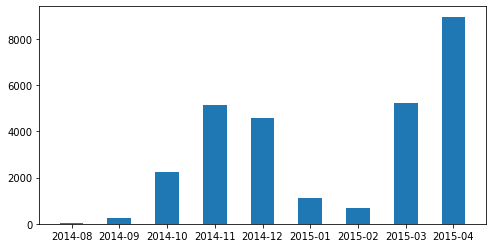

In [36]:
x = ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']
y = os_num
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.5)
plt.show()

In [37]:
num

[96, 462, 1494, 3966, 1422, 732, 822, 1734, 4236]

In [46]:
java_num_sum = []
for i in range(len(num)):
    java_num_sum.append(sum(num[:i+1]))
java_num_sum

[96, 558, 2052, 6018, 7440, 8172, 8994, 10728, 14964]

In [48]:
java_num_p = [x/14964.0 for x in java_num_sum]
java_num_p

[0.006415396952686447,
 0.037289494787489975,
 0.13712910986367283,
 0.40216519647153165,
 0.4971932638331997,
 0.5461106655974338,
 0.6010425020048116,
 0.7169206094627105,
 1.0]

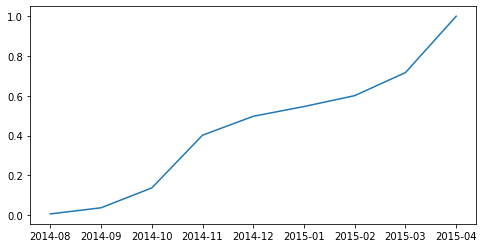

In [50]:
x = ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']
y = java_num_p
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.show()

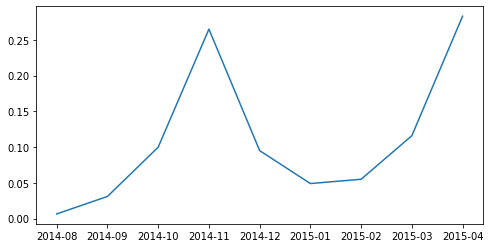

In [51]:
java_num_p2 = [x/14964.0 for x in num]
x = ['2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04']
y = java_num_p2
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.show()